<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371 Homework 9

### Problem 0 (5 points)

## Part 1: Impurity Measures 

### Problem 1.1

### Problem 1.2

### Problem 1.3 (Exam Style)

### Problem 1.4 (Exam Style)

In [1]:
import numpy as np


K = 3
Y = np.arange(K)
S = [0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0]

## Part 2: Decision Tree Basics 

### Problem 2.1 (Exam Style)

### Problem 2.2 (Exam Style)

### Problem 2.3 (Exam Style)

## Part 3: Splits 

### Problem 3.1 (Exam Style)

$$
i(S) = 
$$

$$
\begin{array}{*{7}{c}l}
j & t & |L| & i_L & |R| & i_R & \delta &\text{best} \\\hline
1 & 3 & 1 & 0   & 3 & 1/3 & 1/4 &  \\
\end{array}
$$

## Part 4: Classification Trees

In [2]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall22', course='371', homework=9):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [3]:
import pickle

classification_file = 'classification_data.pickle'
for file_name in ('tree.py', 'draw.py', classification_file):
    retrieve(file_name)
    
with open(classification_file, 'rb') as file:
    classification_data = pickle.load(file)

Using previously downloaded file tree.py
Using previously downloaded file draw.py
Using previously downloaded file classification_data.pickle


In [4]:
from draw import colormap, sample_plot
from matplotlib import pyplot as plt
%matplotlib inline


def draw_samples(samples, y_range, title=None):
    cmap = colormap(y_range)
    plt.figure(figsize=(7, 7), tight_layout=True)
    sample_plot(samples, cmap, 12)
    plt.axis('off')
    plt.axis('equal')
    if title is not None:
        plt.title(title, fontsize=16)

In [5]:
training_set = classification_data['train']
y_range = classification_data['y range']
data_type = classification_data['type']

In [6]:
import numpy as np


def categorical(samples, config):
    p = [np.count_nonzero(samples['y'] == c)
         for c in range(config['K'])]
    return np.array(p, dtype=float) / np.sum(p)


def error_rate(samples, config):
    return 1. - np.amax(categorical(samples, config))

In [7]:
training_config = {
    'min samples': 1,
    'max depth': np.inf,
    'distribution': categorical,
    'impurity': error_rate,
    'K': y_range[1] - y_range[0] + 1
}

In [8]:
from tree import train_tree


t = train_tree(training_set, 0, training_config)

In [9]:
def majority(p):
    return np.argmax(p)

In [10]:
def zero_one_loss(y, y_hat):
    return float(y != y_hat)

In [11]:
from tree import predict


def performance(t, summary, samples, loss):
    xs, ys = samples['x'], samples['y']
    ys_hat = [predict(x, t, summary) for x in xs]
    losses = [loss(y, y_hat) for y, y_hat in zip (ys, ys_hat)]
    risk = np.mean(losses)
    return risk

In [12]:
for which, samples in (
        ('training', classification_data['train']),
        ('test', classification_data['test'])
):
    risk = performance(t, majority, samples, zero_one_loss)
    print('{} {} risk {:.3f}'.format(data_type, which, risk))

classification training risk 0.000
classification test risk 0.012


### Problem 4.1

### Problem 4.2

In [13]:
from draw import Box

In [14]:
def paint_tree(tau, samples, summary, y_range, title=None):
    assert tau.j < 2, 'Can only draw two-dimensional trees'
    cmap = colormap(y_range)
    plt.figure(figsize=(8, 8), tight_layout=True)
    box = Box(samples['x'], cmap=cmap)
    plt.plot((box.left, box.right, box.right, box.left, box.left),
             (box.down, box.down, box.up, box.up, box.down), 'k',
             linewidth=0.5)
    # paint_subtree(tau, box, summary)
    sample_plot(samples, cmap, 5)
    plt.axis('off')
    plt.axis('equal')
    if title is not None:
        title += ' ({} boxes)'.format(count_leaves(tau))
        plt.title(title, fontsize=16)
    plt.show()

### Problem 4.3

## Part 5: Regression Trees 

In [15]:
regression_file = 'regression_data.pickle'
retrieve(regression_file)

with open(regression_file, 'rb') as file:
    regression_data = pickle.load(file)

Using previously downloaded file regression_data.pickle


In [16]:
training_set = regression_data['train']
y_range = regression_data['y range']
data_type = regression_data['type']

### Problem 5.1

## Part 6: Random Decision Forests

In [17]:
spiral_file = 'spiral.pickle'
retrieve(spiral_file)
with open(spiral_file, 'rb') as file:
    spiral = pickle.load(file)


Using previously downloaded file spiral.pickle


In [18]:
from draw import coarse_regions

### Problem 6.1

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Random forest classifier with 5 trees 
h_5 = RandomForestClassifier(
    n_estimators=5,
    max_depth=None,
    min_samples_split=2,
    random_state=0,
    oob_score=True
)

# Random forest classifier with 500 trees 
h_500 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    random_state=0,
    oob_score=True
)

In [21]:
training = spiral['train']
h_5.fit(training['x'], training['y'])
h_500.fit(training['x'], training['y'])

/Users/matt8p/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/matt8p/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)

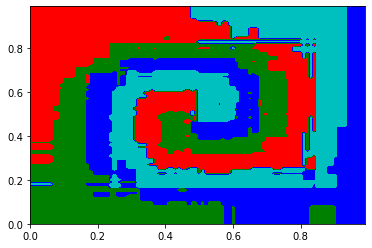

In [22]:
coarse_regions(h_5, spiral['labels'])

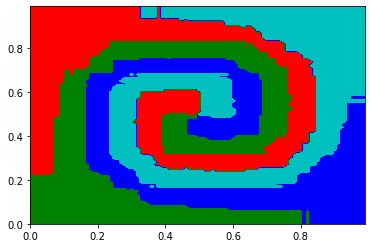

In [23]:
coarse_regions(h_500, spiral['labels'])

In [24]:
from sklearn.metrics import accuracy_score

test = spiral['test']
h_5_predict = h_5.predict(test['x'])
h_500_predict = h_500.predict(test['x'])

h_5_accuracy = accuracy_score(h_5_predict, test['y'])
h_500_accuracy = accuracy_score(h_500_predict, test['y'])


In [25]:
print('Accuracy(5 tree): {}% \nOOB_Accuracy(5 tree): {}% \n\nAccuracy(500 tree): {}% \nOOB_Accuracy(500 tree): {}%'.format(
h_5_accuracy * 100,
h_5.oob_score_ * 100,
h_500_accuracy * 100,
h_500.oob_score_ * 100
))

Accuracy(5 tree): 91.125% 
OOB_Accuracy(5 tree): 65.25% 

Accuracy(500 tree): 96.475% 
OOB_Accuracy(500 tree): 90.25%


### Problem 6.2 (Exam Style)

**Why is the OOB accuracy off when 5 trees are used? Be quantitative, and refer to the slides on random forests for this part.**



**How good is the OOB accuracy estimate with 500 trees? Compare it with the test accuracy. Which one is more reliable?**


**How do the two sets of decision regions and the corresponding test accuracy values compare to each other, qualitatively?**

